We first define the Uni-Directional CFRP material properties

In [26]:
from composite import TransverseIsotropic
XT = 1433.6e6
XC = 1003.3e6
YT = 32.5e6
YC = 108.3e6
S = 76.1e6

E1 = 130.33e9
E2 = 7.220e09 
nu12 = 0.337
G12 = 4.230e09

UD = TransverseIsotropic([E1,E2],nu12,G12)

print(UD)


  Elastic Properties:
  -----------------------------------------------------------
  E1     :     1.303e+11 , E2     :     7.220e+09 
  nu12   :          0.34 , G12    :     4.230e+09 

  Thermal expansion coefficients:
  -----------------------------------------------------------
  alpha1 :     0.000e+00 , alpha2 :     0.000e+00 



From the assigned fiber orientations, we define the stackup

In [28]:
from composite import Laminate

lam = Laminate()

lam.addMaterial( 'UD' , UD )

orientations = [ 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 ]


Then we calculate the forces (N) and moments (M) from the internal pressure

In [27]:
P = 50e5
R = 0.28/2

Nxx = P * R/2
Nyy = P * R
Nxy = 0
Mxx = 0
Myy = 0
Mxy = 0

In [29]:
t = 0.0003 #layer thickness

for angle in orientations:
  lam.addLayer( 'UD' , angle , t )
    
print ("\nA matrix:\n",lam.getA())
print ("\nB matrix:\n",lam.getB())
print ("\nD matrix:\n",lam.getD())



A matrix:
 [[ 9.e+08  4.e+08 -3.e-08]
 [ 4.e+08  3.e+08 -2.e-08]
 [-3.e-08 -2.e-08  4.e+08]]

B matrix:
 [[-1.e-10 -7.e-11  2.e-10]
 [-7.e-11 -7.e-11  9.e-11]
 [ 2.e-10  9.e-11 -2.e-10]]

D matrix:
 [[16088.  7014.   598.]
 [ 7014.  5545.   307.]
 [  598.   307.  7458.]]


In [30]:
# Calculate the stresses in each layer (expressed in the material coordinate system) of the laminate.

# First, calculate the inverse matrices
A1,B1,C1,D1 = lam.getInverseMatrices()

import numpy as np

N = np.array([Nxx, Nyy, Nxy])
M = np.array([Mxx, Myy, Mxy])

eps0  = np.dot( A1 , N ) + np.dot( B1 , M )
kappa = np.dot( C1 , N ) + np.dot( D1 , M )

print("The midplane strains are : ",eps0)
print("The curvatures are       : ",kappa)

The midplane strains are :  [-1.e-03  4.e-03  5.e-20]
The curvatures are       :  [-1.e-17  5.e-17 -2.e-17]


In [31]:
from composite import stressTransformation

sigmaplt = []

for iLay,angle in enumerate(orientations):
  epsilon = eps0 + lam.getZcoord( iLay ) * kappa
  sigma   = np.dot( lam.getQbar(iLay) , epsilon )
  sigmaplt.append(stressTransformation( sigma , angle ))
  
print("The stresses : ",sigmaplt)

The stresses :  [array([56478979., 16437688., 20219635.]), array([ 56478979.,  16437688., -20219635.]), array([56478979., 16437688., 20219635.]), array([ 56478979.,  16437688., -20219635.]), array([56478979., 16437688., 20219635.]), array([ 56478979.,  16437688., -20219635.]), array([56478979., 16437688., 20219635.]), array([ 56478979.,  16437688., -20219635.]), array([56478979., 16437688., 20219635.]), array([ 56478979.,  16437688., -20219635.]), array([56478979., 16437688., 20219635.]), array([ 56478979.,  16437688., -20219635.]), array([56478979., 16437688., 20219635.]), array([ 56478979.,  16437688., -20219635.]), array([56478979., 16437688., 20219635.]), array([ 56478979.,  16437688., -20219635.]), array([56478979., 16437688., 20219635.]), array([ 56478979.,  16437688., -20219635.]), array([56478979., 16437688., 20219635.]), array([ 56478979.,  16437688., -20219635.]), array([56478979., 16437688., 20219635.]), array([ 56478979.,  16437688., -20219635.]), array([56478979., 16437688

The results are stored in the list sigmaplt and can be plotted as a bar chart by means of the following matplotlib code.

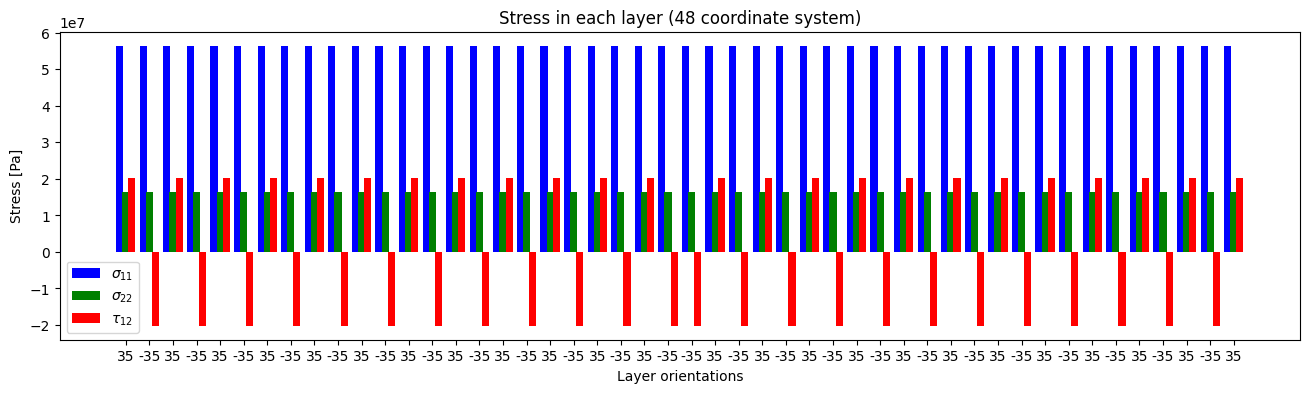

In [32]:
import matplotlib.pyplot as plt

X = np.arange(48)
# Create a figure with a custom size
fig = plt.figure(figsize=(16, 4))

plt.bar(X - 0.26, [s[0] for s in sigmaplt] , color = 'b', width = 0.3, label = "$\\sigma_{11}$")
plt.bar(X       , [s[1] for s in sigmaplt] , color = 'g', width = 0.3, label = "$\\sigma_{22}$")
plt.bar(X + 0.26, [s[2] for s in sigmaplt] , color = 'r', width = 0.3, label = "$\\tau_{12}$")

plt.xticks(X, orientations)

plt.xlabel("Layer orientations")
plt.ylabel("Stress [Pa]")
plt.title("Stress in each layer (48 coordinate system)")

plt.legend()
plt.show()

For some layers cracked, we redefine the stackup to add in some broken layers by reducing the mechanical properties. 

In [45]:
lam.removeAllLayers()

# Strength reduced percentage
r1 = 1
r2 = 0.25
r12 = 0.25

orientations = [ 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 , -35 , 35 ]
orientationsm = [ -35 , 35 , -35 , 35 ]
orientationst = [ -35 , 35 , -35 , 35 ]

In [46]:
lam.addMaterial( 'UD' , UD )
for angle in orientations:
  lam.addLayer( 'UD' , angle , 0.2e-3 )

UDMatrixFailure = TransverseIsotropic( [130.33e9*r1,7.22e9*r2],0.337*r1,4.23e9*r12)
lam.addMaterial( 'UDm' , UDMatrixFailure )
for angle in orientationsm:
    lam.addLayer('UDm', angle , 0.2e-3)

UDTotalFailure = TransverseIsotropic( [1303300,72200],0.00000337,423)
lam.addMaterial( 'UDt' , UDTotalFailure )
for angle in orientationst:
    lam.addLayer('UDt', angle , 0.2e-3)
    
print ("\nA matrix:\n",lam.getA())
print ("\nB matrix:\n",lam.getB())
print ("\nD matrix:\n",lam.getD())


A matrix:
 [[ 6.e+08  2.e+08 -3.e-08]
 [ 2.e+08  2.e+08 -2.e-08]
 [-3.e-08 -2.e-08  3.e+08]]

B matrix:
 [[-240498.  -97980.   -2921.]
 [ -97980.  -96113.   -1554.]
 [  -2921.   -1554. -108091.]]

D matrix:
 [[3716. 1645.  151.]
 [1645. 1233.   77.]
 [ 151.   77. 1735.]]


In [47]:
A1,B1,C1,D1 = lam.getInverseMatrices()

import numpy as np

N = np.array([43750, 87500 , 0 ])
M = np.array([0 , 0. , 0. ])

eps0  = np.dot( A1 , N ) + np.dot( B1 , M )
kappa = np.dot( C1 , N ) + np.dot( D1 , M )

print("The midplane strains are : ",eps0)
print("The curvatures are       : ",kappa)

The midplane strains are :  [-3.e-04  9.e-04 -1.e-07]
The curvatures are       :  [-0.  0. -0.]


In [48]:
from composite import stressTransformation

sigmaplt = []

for iLay,angle in enumerate(orientations+orientationsm+orientationst):
  epsilon = eps0 + lam.getZcoord( iLay ) * kappa
  sigma   = np.dot( lam.getQbar(iLay) , epsilon )
  sigmaplt.append(stressTransformation( sigma , angle ))

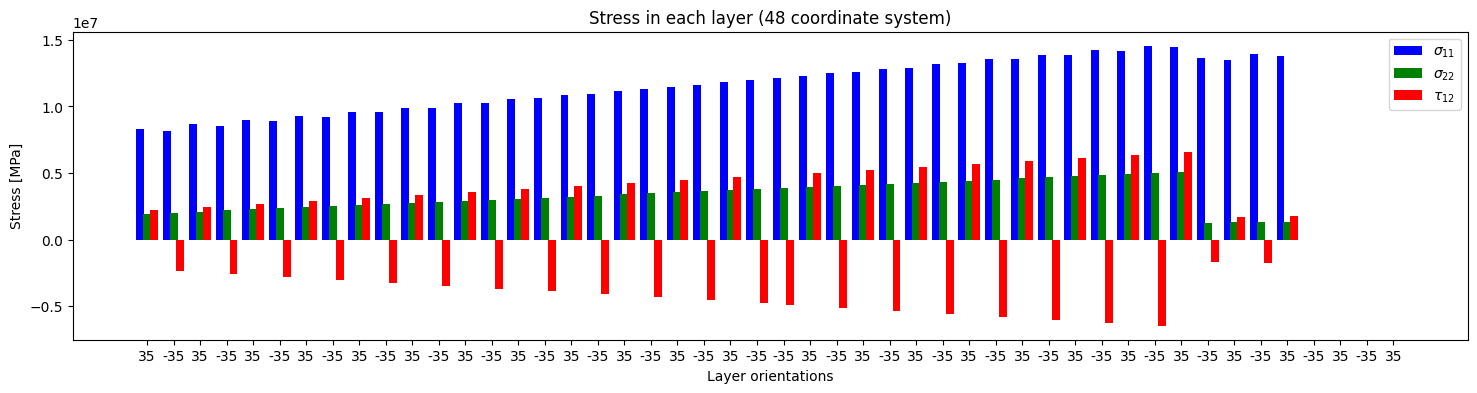

In [49]:
import matplotlib.pyplot as plt

X = np.arange(48)
fig = plt.figure(figsize=(18, 4))

plt.bar(X - 0.26, [s[0] for s in sigmaplt] , color = 'b', width = 0.3, label = "$\\sigma_{11}$")
plt.bar(X       , [s[1] for s in sigmaplt] , color = 'g', width = 0.3, label = "$\\sigma_{22}$")
plt.bar(X + 0.26, [s[2] for s in sigmaplt] , color = 'r', width = 0.3, label = "$\\tau_{12}$")
np.set_printoptions(precision=0)
plt.xticks(X, orientations+orientationsm+orientationst)

plt.xlabel("Layer orientations")
plt.ylabel("Stress [MPa]")
plt.title("Stress in each layer (48 coordinate system)")

plt.legend()
plt.show()